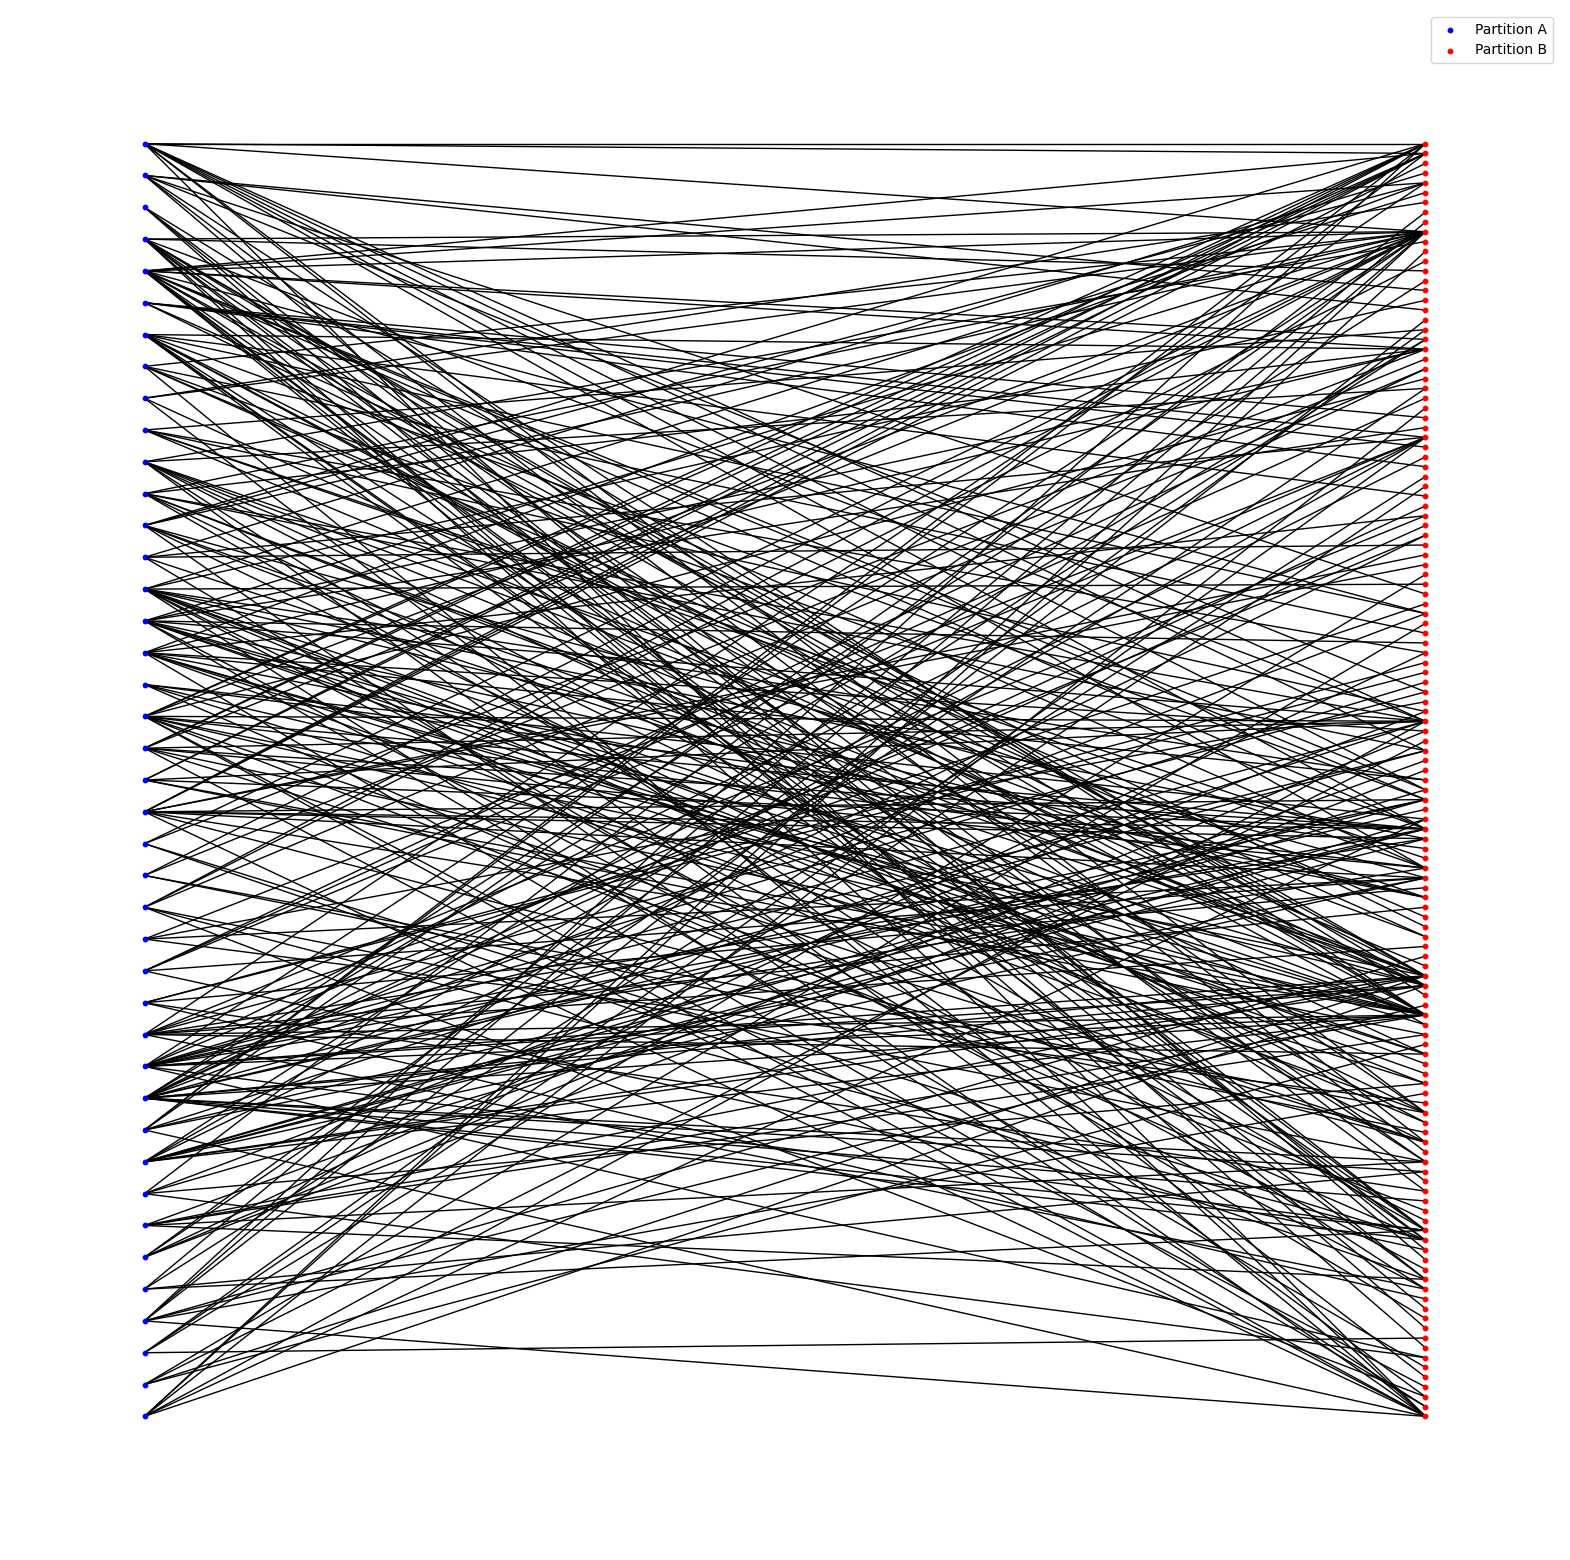

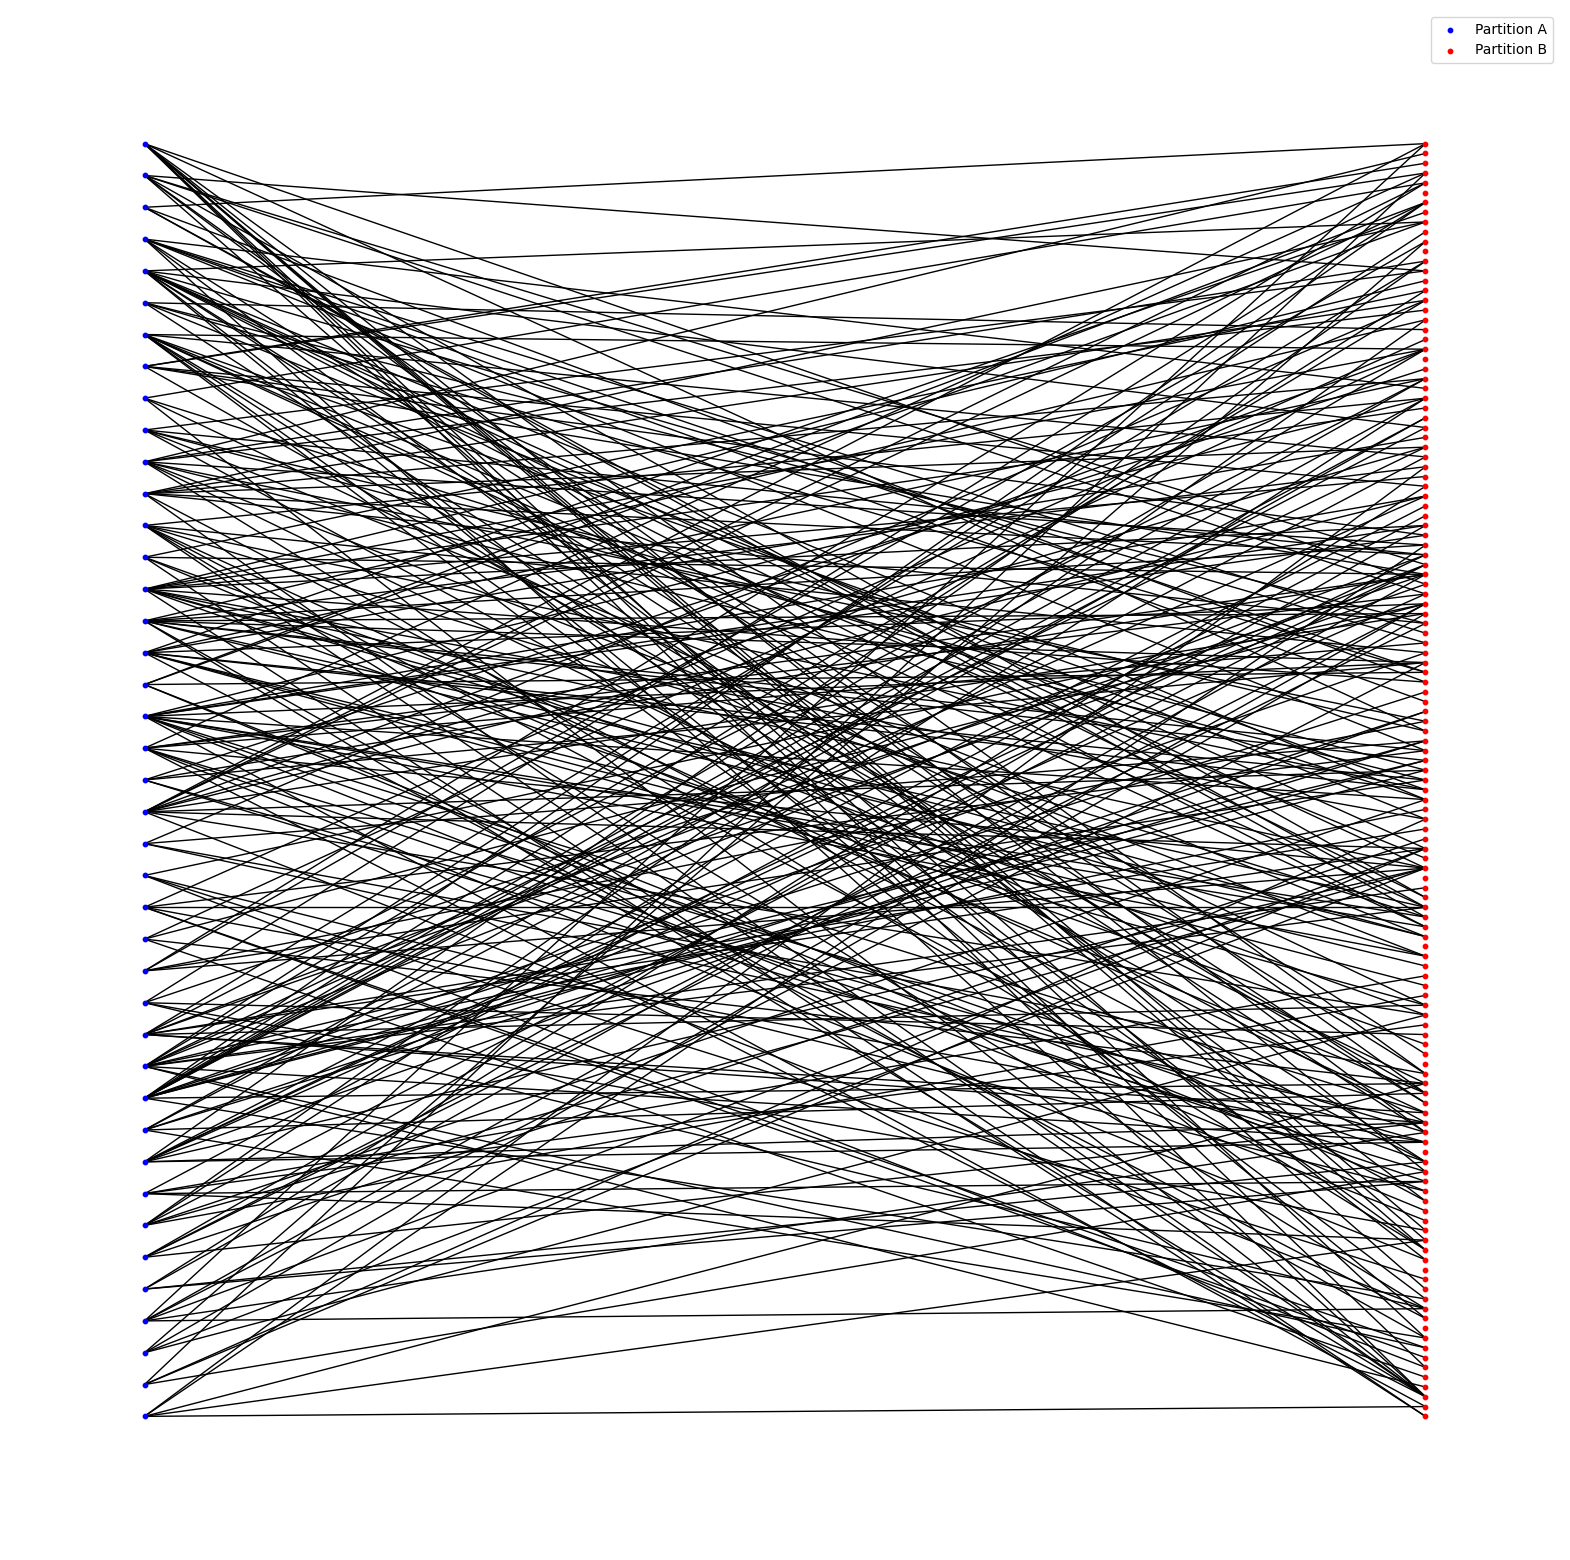

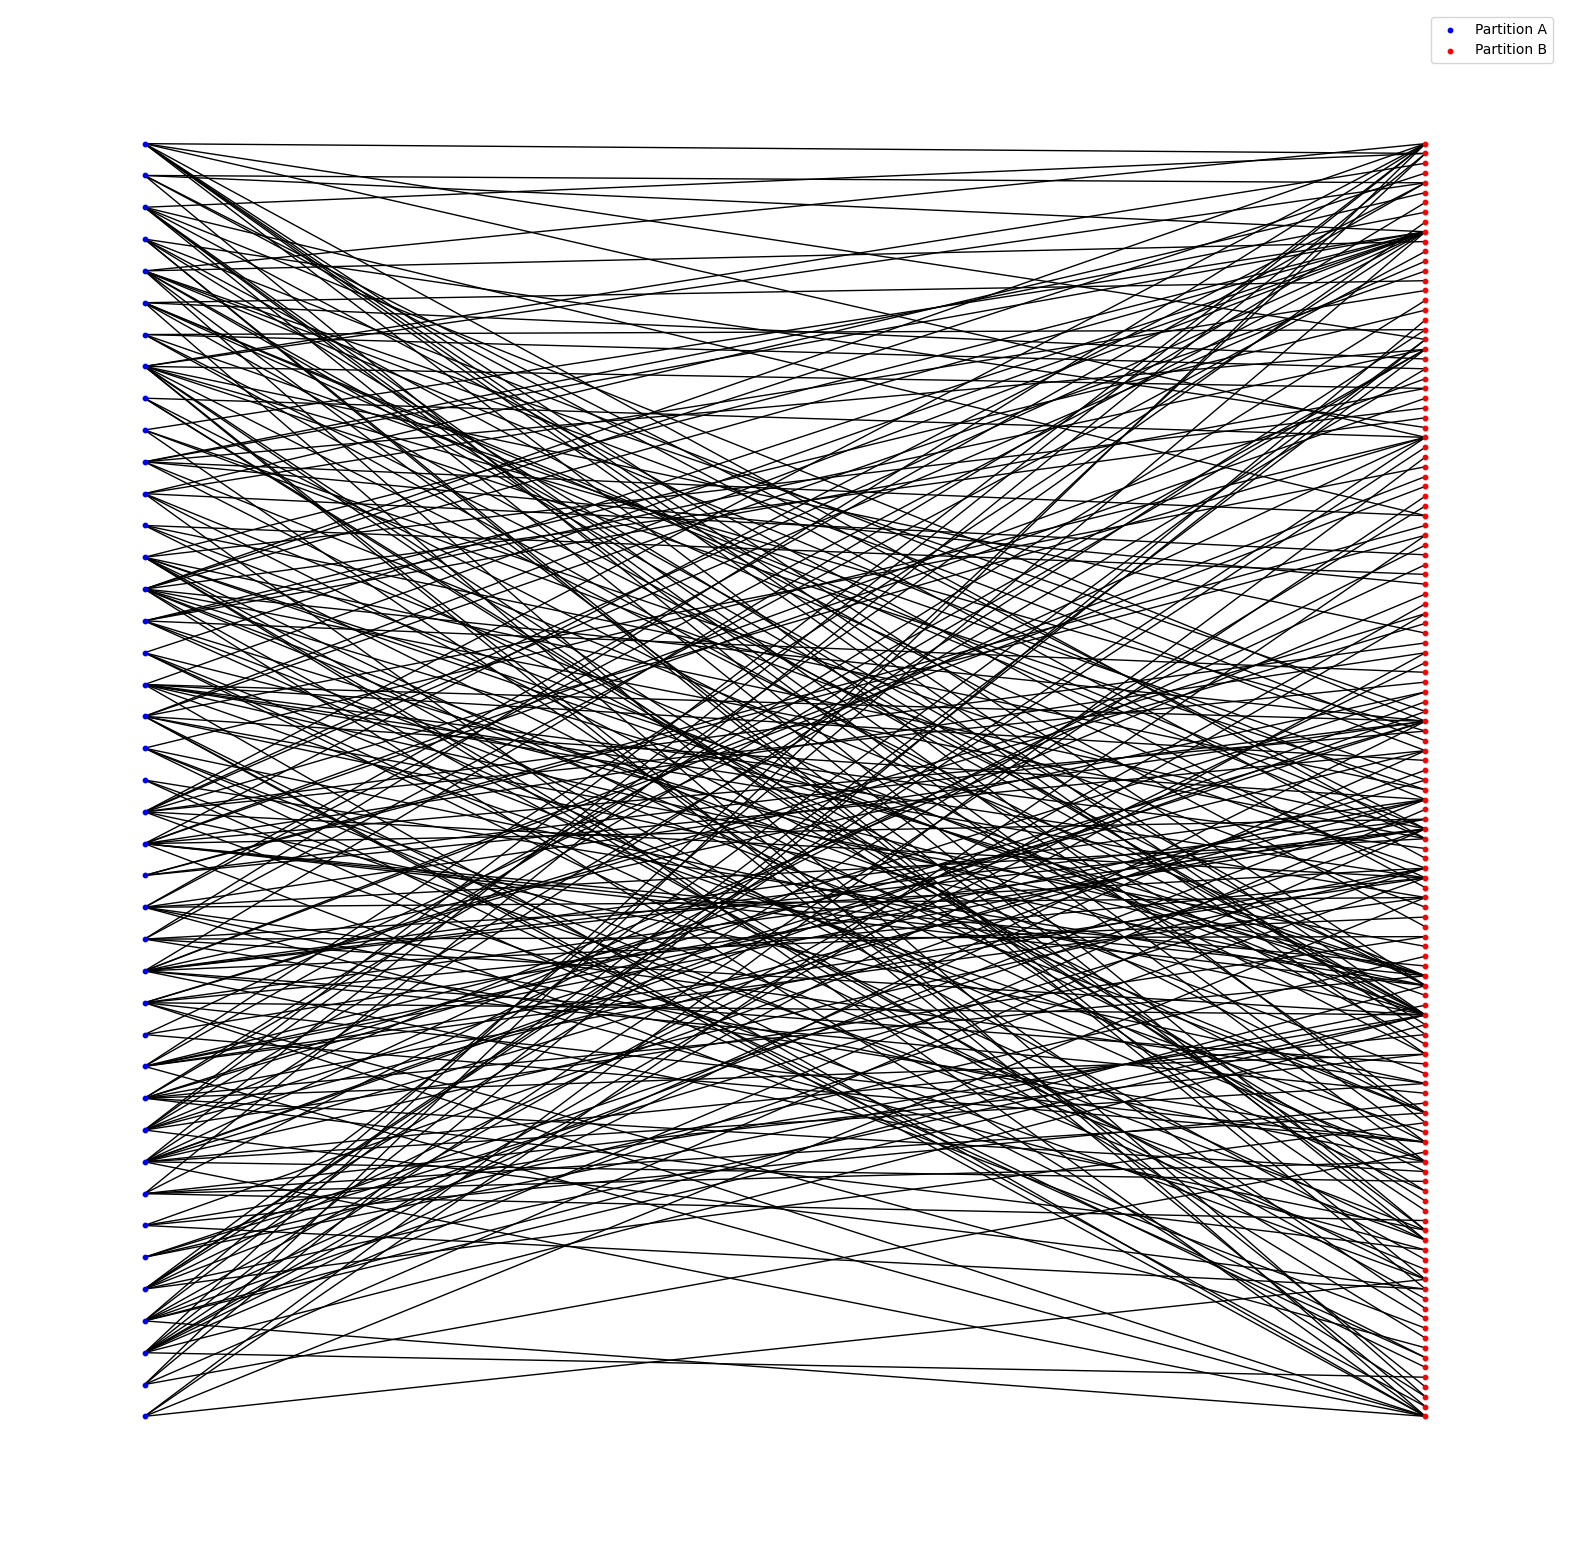

In [1]:
import sys

sys.path.insert(0, "../")

import networkx as nx
import pandas as pd
import random
from scripts.get_graph import get_graph
from scripts.plots import plotGraph
from scripts.plots import plotBipartiteGraph
import matplotlib.pyplot as plt


def null_model_link_swap(original_graph):
    random_graph = original_graph.copy()

    # Extract edges from the original graph
    edges = list(original_graph.edges())

    # Identify nodes in each partition (assuming 'bipartite' node attribute is present)
    partition_A = [
        node
        for node in original_graph.nodes
        if original_graph.nodes[node]["bipartite"] == 0
    ]
    partition_B = [
        node
        for node in original_graph.nodes
        if original_graph.nodes[node]["bipartite"] == 1
    ]

    # Shuffle the numbers within each partition
    random.shuffle(partition_A)
    random.shuffle(partition_B)

    # Create a new list of tuples by pairing up the shuffled numbers
    shuffled_edges = [
        (random.choice(partition_A), random.choice(partition_B))
        for _ in range(len(edges))
    ]

    # Remove all edges from the random graph and add shuffled edges
    random_graph.remove_edges_from(list(random_graph.edges()))
    random_graph.add_edges_from(shuffled_edges)

    return random_graph


def null_model_degree_preservation(original_graph, swap):
    random_graph = original_graph.copy()
    # Get nodes in partition A
    partition_A = {
        node
        for node, bipartite in random_graph.nodes(data="bipartite")
        if bipartite == 0
    }
    # Get nodes in partition B
    partition_B = {
        node
        for node, bipartite in random_graph.nodes(data="bipartite")
        if bipartite == 1
    }

    if swap:
        partition_C = partition_A
        partition_A = partition_B
        partition_B = partition_C

    for node_A in partition_A:
        # Get neighbors in partition B
        neighbors_B = list(random_graph.neighbors(node_A))

        # Randomly shuffle the neighbors
        random.shuffle(neighbors_B)

        # Remove existing edges and add new edges to shuffled nodes in B
        for neighbor_B in neighbors_B:
            edge_to_remove = (node_A, neighbor_B)
            random_graph.remove_edge(*edge_to_remove)

            # Randomly select a node in B
            random_node_B = random.choice(list(partition_B))
            # Add the edge to the randomly selected node in B
            random_graph.add_edge(node_A, random_node_B)

    return random_graph


#
# Get the adjacency matrix from the data
adjacency_matrix = pd.read_csv("../../dataset/adjacency_matrix.csv").values

# Remove the last column of the adjacency matrix
adjacency_matrix = adjacency_matrix[:, :-1]

num_rows, num_cols = adjacency_matrix.shape

network = get_graph(adjacency_matrix)

original_graph = get_graph(adjacency_matrix)

# Plot the orignal network
# plotGraph(original_graph)
plotBipartiteGraph(original_graph)


# Plot the null_model_1 network
# randomized_graph_1 = null_model_link_swap(original_graph)
# plotGraph(randomized_graph_1)
# plotBipartiteGraph(randomized_graph_1)


# Plot the null_model_2 diseases degree preservation
randomized_graph_2 = null_model_degree_preservation(original_graph, 0)
# plotGraph(randomized_graph_2)
plotBipartiteGraph(randomized_graph_2)


# Plot the null_model_3 network symptoms degree preservation
randomized_graph_3 = null_model_degree_preservation(original_graph, 1)
# plotGraph(randomized_graph_3)
plotBipartiteGraph(randomized_graph_3)